# Principal Component Analysis

In [2]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text

In [3]:
# Read the CSV file containing body measurements data from GitHub URL into a pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/BodyMeasurements.csv')

# Clean column names by removing any leading/trailing whitespace
df.columns = df.columns.str.strip()

# Display information about the DataFrame including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             715 non-null    float64
 1   Age                716 non-null    int64  
 2   HeadCircumference  716 non-null    int64  
 3   ShoulderWidth      716 non-null    int64  
 4   ChestWidth         716 non-null    int64  
 5   Belly              716 non-null    int64  
 6   Waist              716 non-null    int64  
 7   Hips               716 non-null    int64  
 8   ArmLength          716 non-null    int64  
 9   ShoulderToWaist    716 non-null    int64  
 10  WaistToKnee        716 non-null    int64  
 11  LegLength          716 non-null    int64  
 12  TotalHeight        716 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 72.8 KB


Columns name translations:
- Gender -> Genere
- Age -> Età
- HeadCircumference -> CirconferenzaTesta
- ShoulderWidth -> LarghezzaSpalle
- ChestWidth -> LarghezzaTorace
- Belly -> Pancia
- Waist -> Vita
- Hips -> Fianchi
- ArmLength -> LunghezzaBraccio
- ShoulderToWaist -> SpallaAVita
- WaistToKnee -> VitaAGinocchio
- LegLength -> LunghezzaGamba
- TotalHeight -> AltezzaTotale

## Cleaning outlier data


In [4]:
column_names = ['Belly', 'ArmLength', "ShoulderWidth", "HeadCircumference", "WaistToKnee", "Waist"]

for column_name in column_names:
    # Select the columns "column_name"
    CN_data = df[column_name]
    # Calculate the mean of the column
    mean = CN_data.mean()
    # Calculate the standard deviation of the column
    std = CN_data.std()
    # Define the threshold for identifying outliers (number of standard deviations from the mean)
    threshold = 3 #Se un valore è lontano più di 3 std dalla media
    # Compute the thresholds for outlier detection
    computed_threshold = threshold * std
    # Identify outliers based on the standard deviation method
    standard_deviation_CN_outliers = np.abs(CN_data - mean) > computed_threshold #Tutti True e False
    # Count the number of outliers
    num_outliers = standard_deviation_CN_outliers.sum()
    # Print the results
    print(f"Column: {column_name}")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std}")
    print(f"Threshold: {threshold}")
    print(f"Computed Threshold: {computed_threshold}")
    print(f"Number of Outliers: {num_outliers}\n")

    # Remove rows where the current column has outliers (values beyond 3 std from mean)
    # ~standard_deviation_CN_outliers inverts True/False values
    # This keeps only rows where the value is within the threshold
    df = df[~standard_deviation_CN_outliers]

Column: Belly
Mean: 20.199720670391063
Standard Deviation: 10.132992568012883
Threshold: 3
Computed Threshold: 30.39897770403865
Number of Outliers: 1

Column: ArmLength
Mean: 18.82097902097902
Standard Deviation: 5.379320986729714
Threshold: 3
Computed Threshold: 16.137962960189142
Number of Outliers: 4

Column: ShoulderWidth
Mean: 14.313642756680732
Standard Deviation: 4.770073620546846
Threshold: 3
Computed Threshold: 14.310220861640538
Number of Outliers: 1

Column: HeadCircumference
Mean: 20.585915492957746
Standard Deviation: 3.7409522548169845
Threshold: 3
Computed Threshold: 11.222856764450952
Number of Outliers: 3

Column: WaistToKnee
Mean: 16.536067892503535
Standard Deviation: 5.159197934449582
Threshold: 3
Computed Threshold: 15.477593803348746
Number of Outliers: 1

Column: Waist
Mean: 19.211048158640228
Standard Deviation: 8.678133752404824
Threshold: 3
Computed Threshold: 26.03440125721447
Number of Outliers: 8



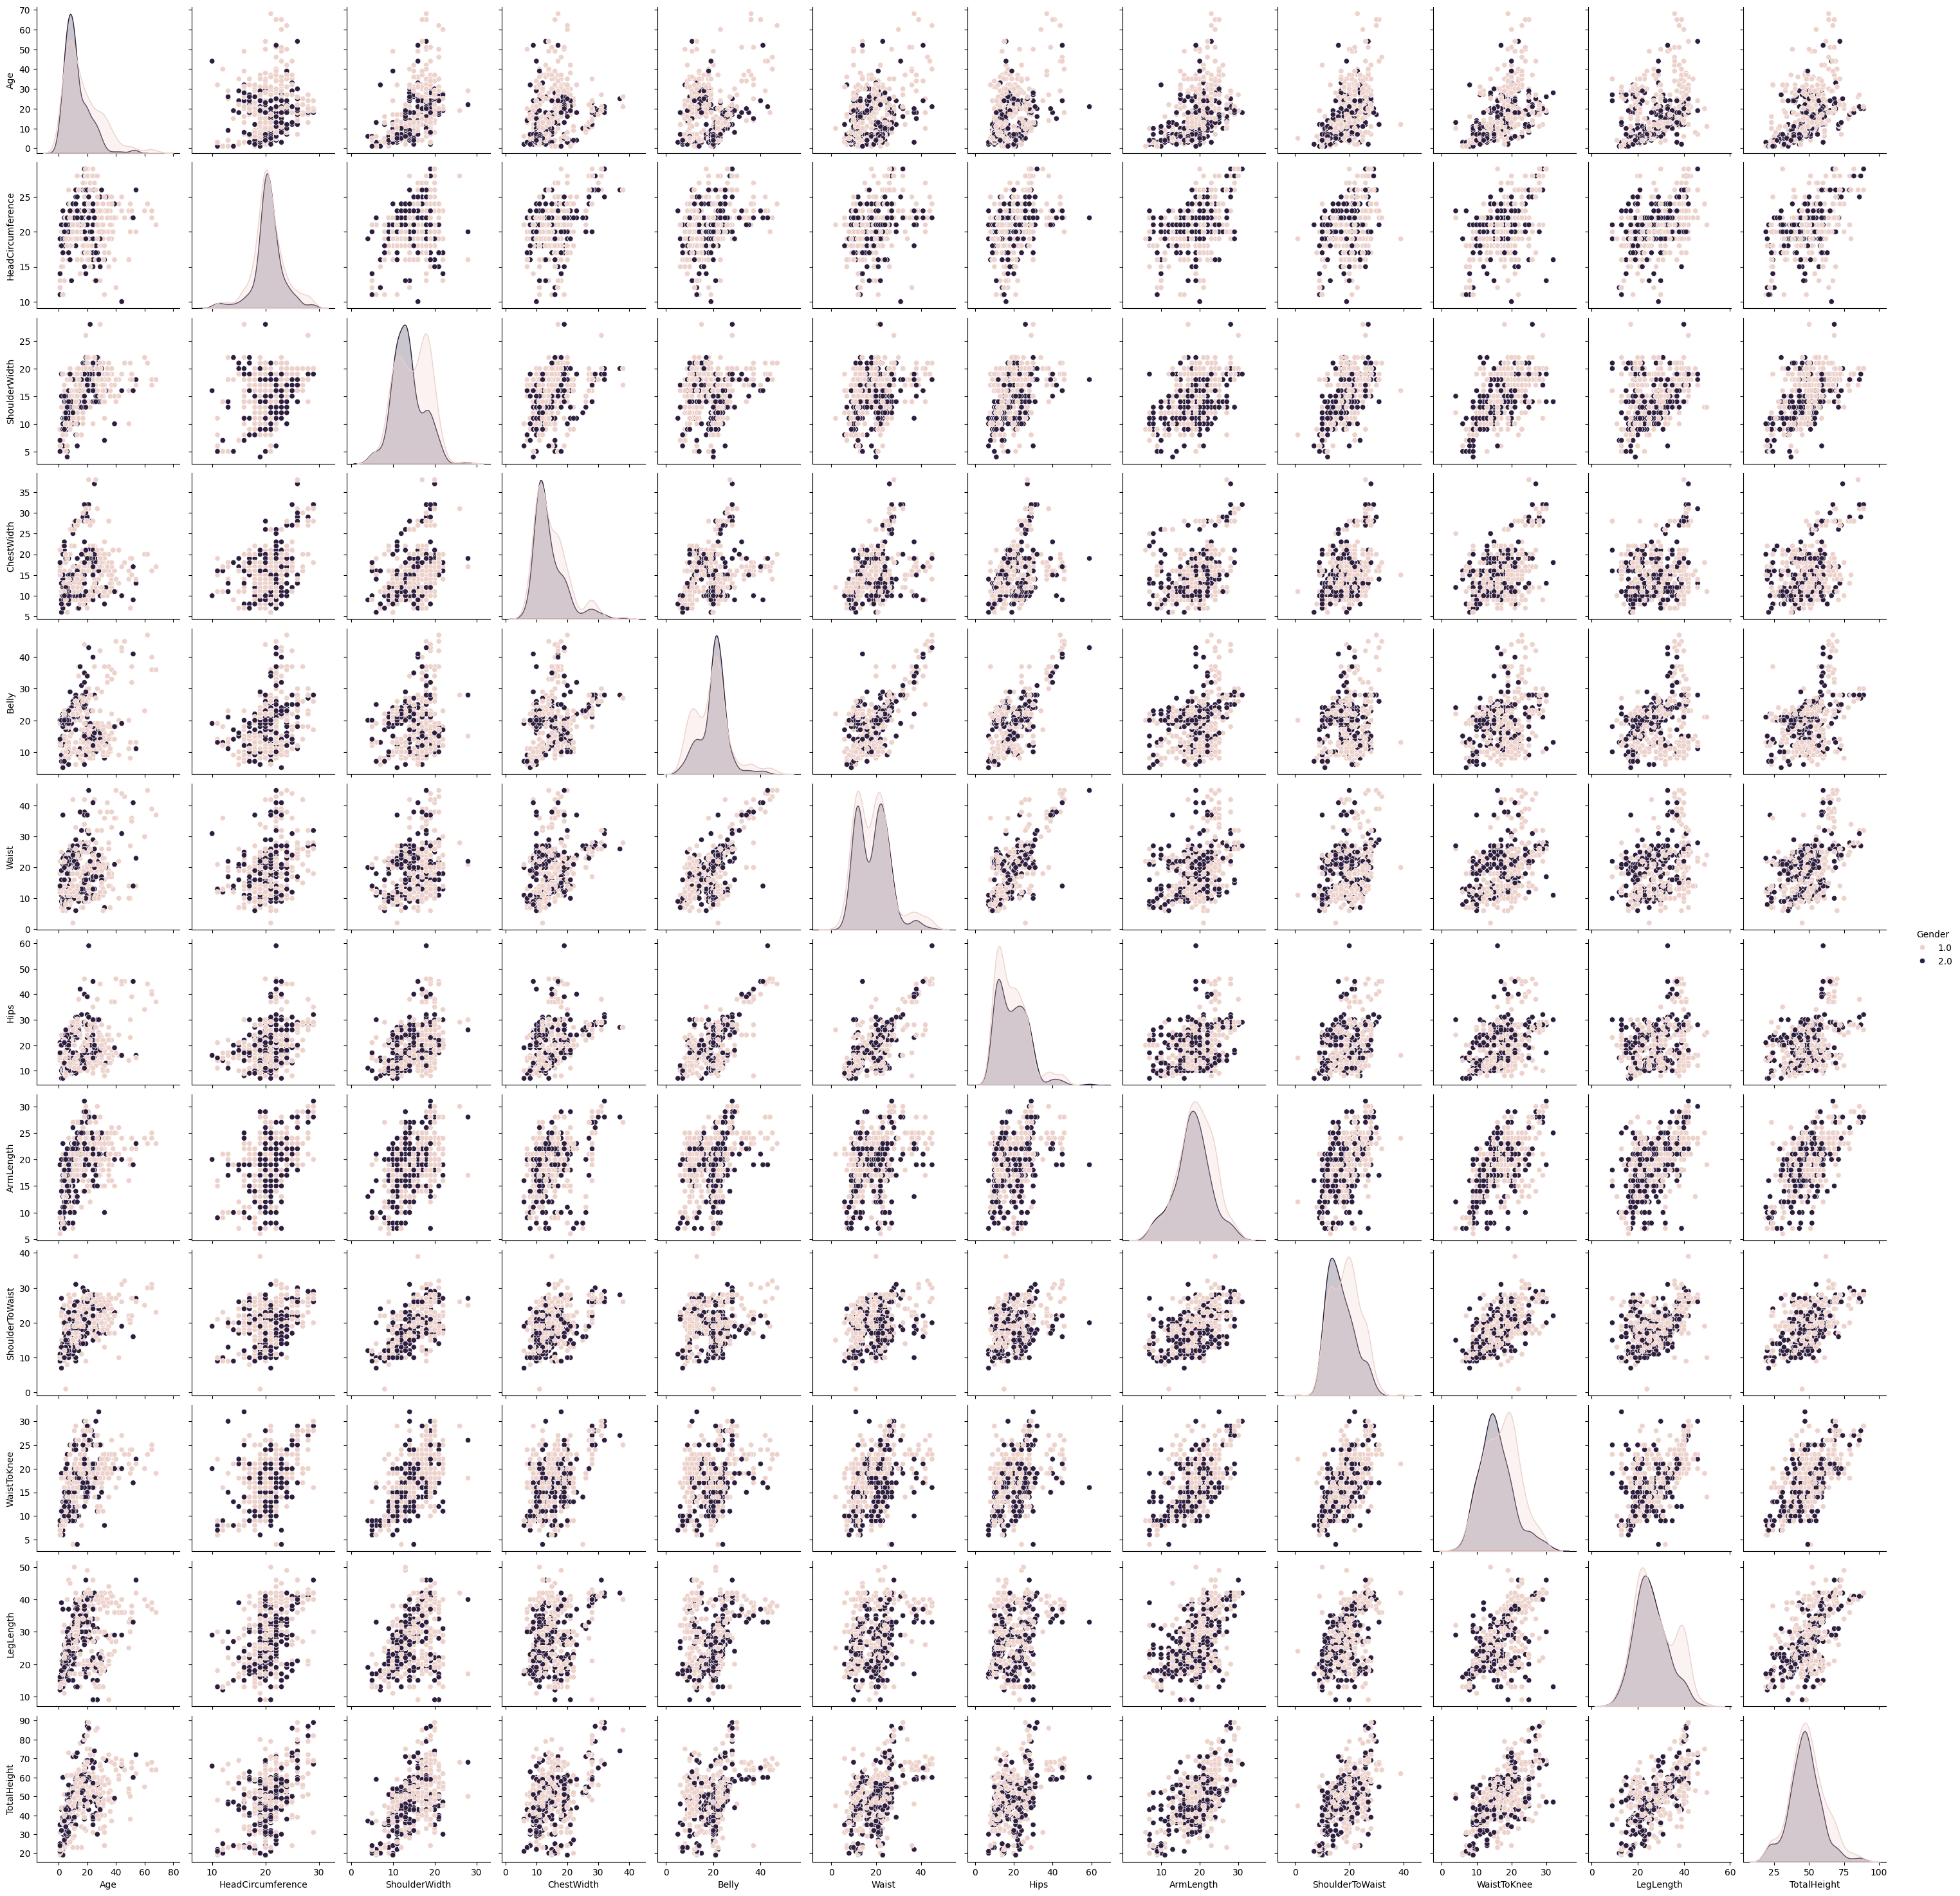

In [5]:
# Pairplot
sns.pairplot(df, hue='Gender')

In [6]:
df.columns

Index(['Gender', 'Age', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth',
       'Belly', 'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 'WaistToKnee',
       'LegLength', 'TotalHeight'],
      dtype='object')

## Mantain some columns

In [7]:
#non consideriamo età e genere
df = df[['HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly', 'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight']]

In [8]:
# Standardize the data ----> Very important for PCA!
scaler = StandardScaler()

In [9]:
# Store column names from the original dataframe
cols = df.columns

# Standardize the data using the StandardScaler (centers data around mean=0 and scales to unit variance)
df_standardized = scaler.fit_transform(df)

# Convert the standardized numpy array back to a pandas DataFrame with original column names
# This is needed because StandardScaler returns a numpy array
df_standardized = pd.DataFrame(df_standardized, columns=cols)

# Display the first 5 rows of the standardized DataFrame
df_standardized.head()

HeadCircumference  ShoulderWidth  ChestWidth     Belly     Waist      Hips  \
0           0.501162       0.985628    1.029307 -0.268436 -0.625480  0.353320   
1          -0.533782       2.011298    0.463593 -0.268436  0.286515  0.723430   
2           0.156181       0.985628    0.275022 -0.850326 -1.146619 -0.510272   
3          -0.188801       1.498463    0.652165 -1.286743  0.025945 -0.633642   
4          -1.568727      -0.040042    0.652165 -0.995798 -1.016334  1.340281   

   ArmLength  ShoulderToWaist  WaistToKnee  LegLength  TotalHeight  
0   0.724511         1.348255     1.681976  -0.609939     0.323238  
1   2.016232         0.971822     1.681976  -0.864948     0.652730  
2   0.509224         0.030740    -0.489575  -1.119957     0.405611  
3   1.155085         0.595389     0.694907  -0.737443    -0.253374  
4   1.370372         0.783606     3.063872  -1.757479    -0.088628

In [10]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1]) #Componenti = numero di colonne
pca.fit(df_standardized)
# Transform the data
# Store original column names for later use in visualization
x_new_cols = df_standardized.columns
# Transform the standardized data into principal components
# This creates a new dataset where each column is a principal component
x_new = pca.fit_transform(df_standardized)
#x_new = pd.DataFrame(x_new, columns=[f'PC{i+1}' for i in range(x_new.shape[1])]) #Creo df dando nomi colonne "pc1", "pc2"...
#x_new.head()

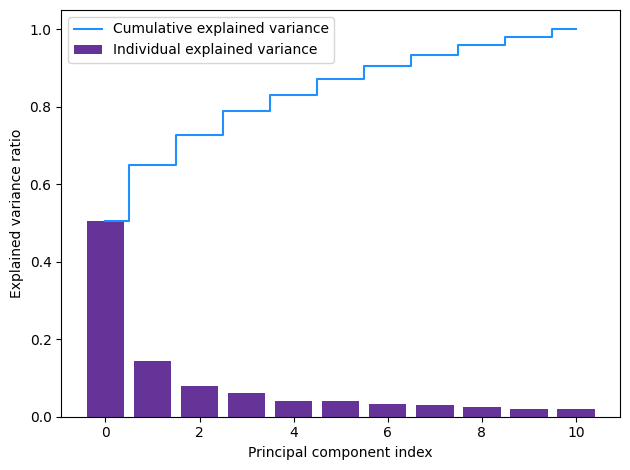

In [11]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Individual explained variance', color='rebeccapurple')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color='dodgerblue')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Osservazioni:
- con le prime 3 componenti spieghiamo il 70% della varianza del dataset (solo la prima colonna il 50%)
- quindi possiamo utilizzare solo le prime 3 colonne: rispetto ad usarle tutte riduce il rumore.

In [12]:
def myplot(score, coeff, labels=None):
    # Extract first and second principal components
    xs = score[:, 0]
    ys = score[:, 1]
    
    # Get number of variables
    n = coeff.shape[0]
    
    # Calculate scaling factors to normalize the plot
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    # Create a new figure with specified size
    plt.figure(figsize=(8, 8))
    
    # Plot all points in the score (transformed data points)
    plt.scatter(xs * scalex, ys * scaley, alpha=0.3, color="dodgerblue")
    
    # Initialize list to store text objects
    texts = []
    multplier = 1.0
    
    # Plot vectors for each variable
    for i in range(n):
        # Draw arrow from origin to the loading scores for each variable
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color="orange", alpha=1, lw=0.8, head_width=0.01)
        
        # Add variable labels
        text = plt.text(coeff[i, 0] * multplier, coeff[i, 1] * multplier, 
                       labels[i], color="black", ha='center', va='center')
        texts.append(text)
    
    # Set axis labels
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
    # Adjust text positions to avoid overlapping
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, 
               arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

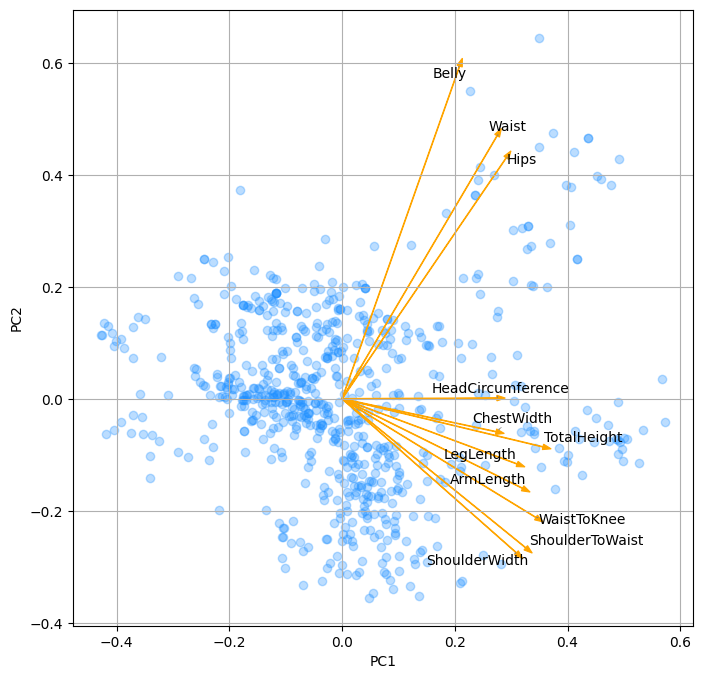

In [26]:
# Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), x_new_cols)
plt.show()

In [27]:
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.6
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')

Minimum number of components to explain 60.0% of variance: 2


In [28]:
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.8
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')

Minimum number of components to explain 80.0% of variance: 5


In [16]:
color_blue = "#1a559e"
color_blue_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"

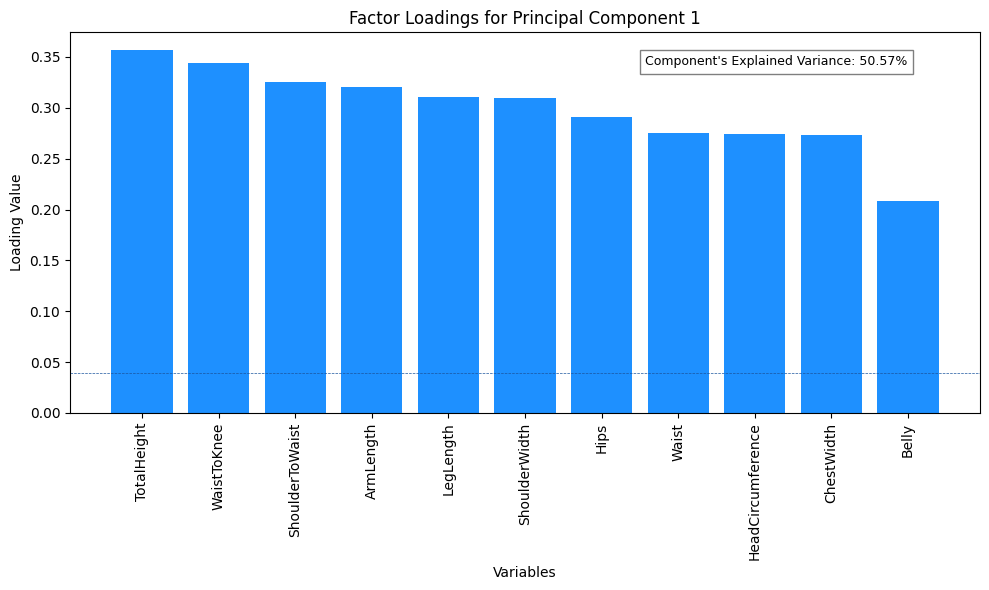

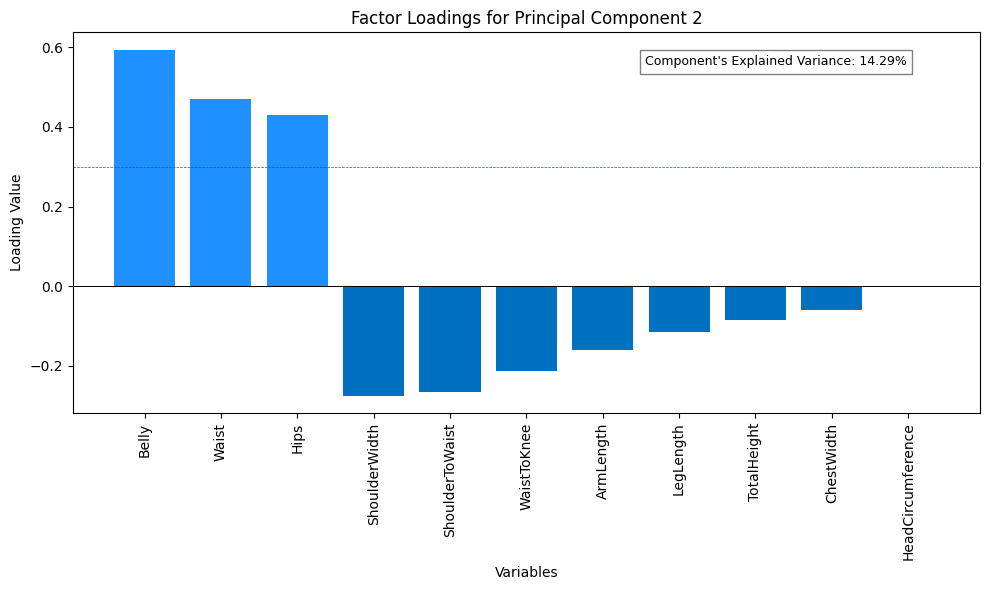

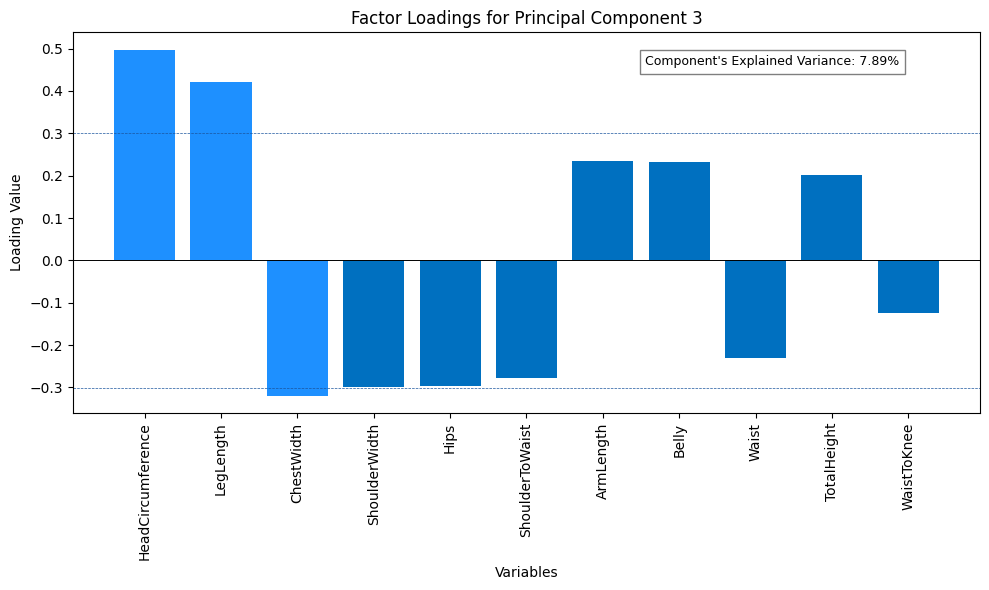

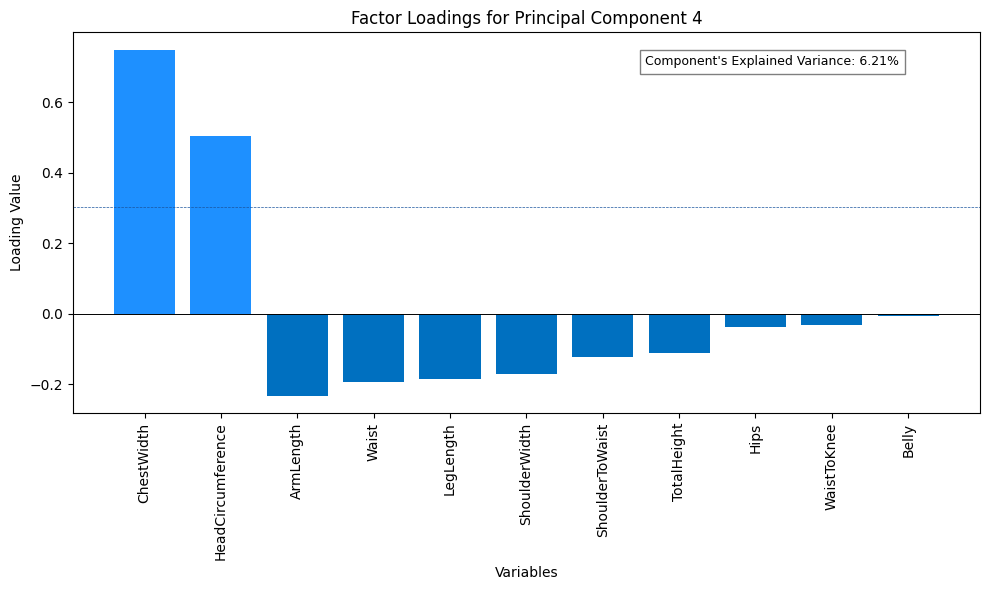

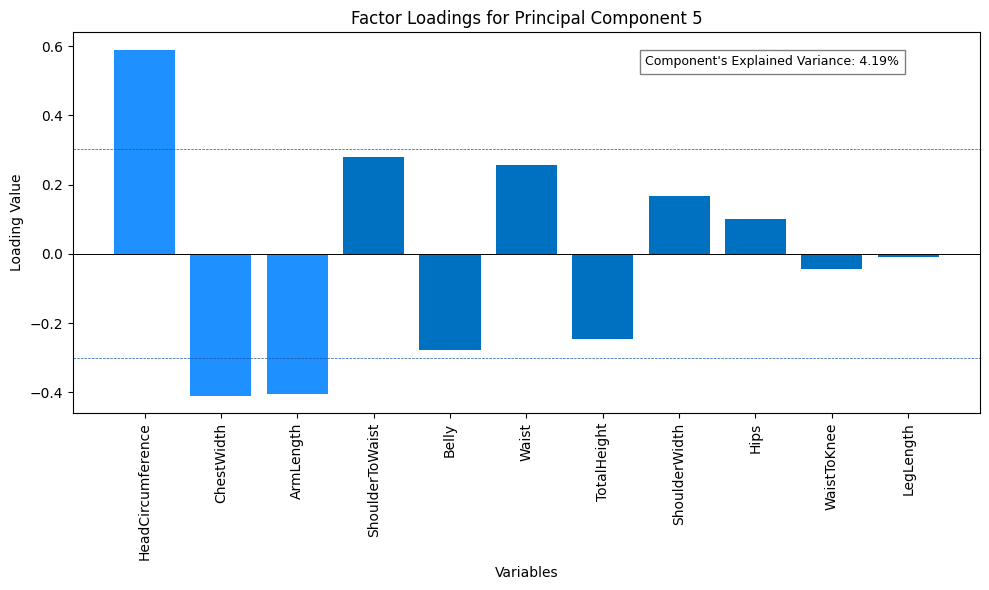

In [29]:
loadings = pca.components_.T  # Transpose the components matrix to get loadings matrix
# Plotting the components to gain an explained variance threshold before defined
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    # Sort loadings by absolute value in descending order
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = x_new_cols[sorted_idx]    # Get corresponding variable names
    std_loading = np.std(sorted_loadings)    # Calculate standard deviation of loadings
    
    # Colors based on comparison with the mean
    # Use light blue for values >= std, vivid blue for values < std
    colors = [color_blue_light if abs(loading) >= std_loading else color_blue_vivid for loading in sorted_loadings]
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    
    # Add horizontal lines for reference
    plt.axhline(std_loading, color=color_blue, linestyle='--', linewidth=0.5)    # Upper std threshold
    plt.axhline(0, color='black', linewidth=0.7)    # Zero line
    # Add lower std threshold line if needed
    if sorted_loadings.min() < std_loading * -1:
        plt.axhline(-std_loading, color=color_blue, linestyle='--', linewidth=0.5)
    
    # Add text box with explained variance information    
    explained_variance = exp_var_pca[i] * 100  # convert to percentage
    textstr = f"Component's Explained Variance: {explained_variance:.2f}%"
    # Place the text box in the upper left corner with white background
    plt.gcf().text(0.65, 0.9, textstr, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.show()